In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('../DatasetITA/Train')
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA\\Train'

In [3]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [4]:
data

[['a/AC_Word_a_08.png', 'a'],
 ['a/AR_Word_a_07.png', 'a'],
 ['a/AS_Word_a_09.png', 'a'],
 ['a/BC_Word_a_01.png', 'a'],
 ['a/BS_Word_a_02.png', 'a'],
 ['a/CF_Word_a_12.png', 'a'],
 ['a/DS_Word_a_05.png', 'a'],
 ['a/DS_Word_a_10.png', 'a'],
 ['a/MA_Word_a_03.png', 'a'],
 ['a/PC_Word_a_04.png', 'a'],
 ['a/SS_Word_a_06.png', 'a'],
 ['b/AC_Word_b_08.png', 'b'],
 ['b/AR_Word_b_07.png', 'b'],
 ['b/AS_Word_b_09.png', 'b'],
 ['b/BC_Word_b_01.png', 'b'],
 ['b/BS_Word_b_02.png', 'b'],
 ['b/CF_Word_b_12.png', 'b'],
 ['b/DS_Word_b_05.png', 'b'],
 ['b/DS_Word_b_10.png', 'b'],
 ['b/MA_Word_b_03.png', 'b'],
 ['b/PC_Word_b_04.png', 'b'],
 ['b/SS_Word_b_06.png', 'b'],
 ['c/AC_Word_c_08.png', 'c'],
 ['c/AR_Word_c_07.png', 'c'],
 ['c/AS_Word_c_09.png', 'c'],
 ['c/BC_Word_c_01.png', 'c'],
 ['c/BS_Word_c_02.png', 'c'],
 ['c/CF_Word_c_12.png', 'c'],
 ['c/DS_Word_c_05.png', 'c'],
 ['c/DS_Word_c_10.png', 'c'],
 ['c/MA_Word_c_03.png', 'c'],
 ['c/PC_Word_c_04.png', 'c'],
 ['c/SS_Word_c_06.png', 'c'],
 ['d/AC_Wo

In [5]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA\\Train'

In [6]:
len(data)

110

In [7]:
import csv
os.chdir('../../codesITA')
header = ['filename', 'label']

with open('training_labelsITA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [8]:
train_data = pd.read_csv('training_labelsITA.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [9]:
idg = ImageDataGenerator(rescale=1./255)

In [10]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [11]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam_20.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32, (2, 2), input_shape=(224, 224, 1), activation='relu', strides=2, name='convo1'))
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo2'))
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    # Step 2 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo3'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    # Step 3 - Convolution
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo4'))
    # Step 3 - Pooling
    #classifier.add(MaxPooling2D(pool_size=(2, 2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation='relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.4)))
    classifier.add(Dense(10, activation='softmax'))

    return classifier




Found 88 validated image filenames belonging to 10 classes.
Found 22 validated image filenames belonging to 10 classes.
Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 6.0069 - accuracy: 0.0227
Epoch 00001: val_accuracy improved from -inf to 0.13636, saving model to saved_models(20epoch)ITA\model_1.h5
3/3 [==============================] - 2s 527ms/step - loss: 6.0069 - accuracy: 0.0227 - val_loss: 6.6102 - val_accuracy: 0.1364
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 4.0031 - accuracy: 0.1250
Epoch 00002: val_accuracy did not improve from 0.13636
3/3 [==============================] - 1s 328ms/step - loss: 4.0031 - accuracy: 0.1250 - val_loss: 3.4034 - val_accuracy: 0.0909
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 2.9059 - accuracy: 0.2955
Epoch 00003: val_accuracy did not improve from 0.13636
3/3 [==============================] - 1s 342ms/step - loss: 2.9059 - accuracy: 0.2955 - val_loss: 2.6547 - val_accuracy: 0.090

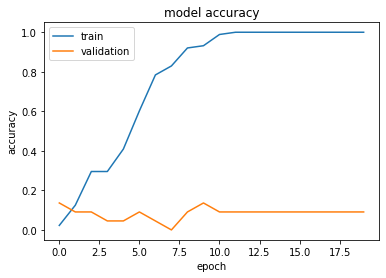

Found 88 validated image filenames belonging to 10 classes.
Found 22 validated image filenames belonging to 10 classes.
Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 4.4337 - accuracy: 0.0682
Epoch 00001: val_accuracy improved from -inf to 0.09091, saving model to saved_models(20epoch)ITA\model_2.h5
3/3 [==============================] - 2s 525ms/step - loss: 4.4337 - accuracy: 0.0682 - val_loss: 5.4506 - val_accuracy: 0.0909
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 2.5934 - accuracy: 0.2614
Epoch 00002: val_accuracy did not improve from 0.09091
3/3 [==============================] - 1s 298ms/step - loss: 2.5934 - accuracy: 0.2614 - val_loss: 2.5725 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 2.0596 - accuracy: 0.3523
Epoch 00003: val_accuracy improved from 0.09091 to 0.13636, saving model to saved_models(20epoch)ITA\model_2.h5
3/3 [==============================] - 1s 450ms/step - loss: 2.059

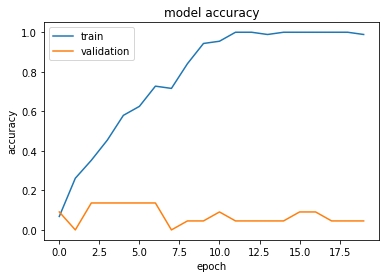

Found 88 validated image filenames belonging to 10 classes.
Found 22 validated image filenames belonging to 10 classes.
Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 5.3687 - accuracy: 0.0568
Epoch 00001: val_accuracy improved from -inf to 0.09091, saving model to saved_models(20epoch)ITA\model_3.h5
3/3 [==============================] - 2s 600ms/step - loss: 5.3687 - accuracy: 0.0568 - val_loss: 7.4725 - val_accuracy: 0.0909
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 3.4237 - accuracy: 0.1932
Epoch 00002: val_accuracy did not improve from 0.09091
3/3 [==============================] - 1s 325ms/step - loss: 3.4237 - accuracy: 0.1932 - val_loss: 5.3978 - val_accuracy: 0.0909
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 2.7430 - accuracy: 0.2841
Epoch 00003: val_accuracy did not improve from 0.09091
3/3 [==============================] - 1s 309ms/step - loss: 2.7430 - accuracy: 0.2841 - val_loss: 3.8279 - val_accuracy: 0.090

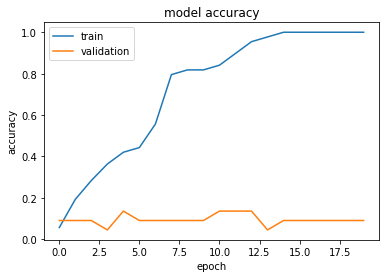

Found 88 validated image filenames belonging to 10 classes.
Found 22 validated image filenames belonging to 10 classes.
Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 5.9150 - accuracy: 0.0682
Epoch 00001: val_accuracy improved from -inf to 0.09091, saving model to saved_models(20epoch)ITA\model_4.h5
3/3 [==============================] - 2s 607ms/step - loss: 5.9150 - accuracy: 0.0682 - val_loss: 5.9596 - val_accuracy: 0.0909
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 3.0950 - accuracy: 0.1818
Epoch 00002: val_accuracy did not improve from 0.09091
3/3 [==============================] - 1s 311ms/step - loss: 3.0950 - accuracy: 0.1818 - val_loss: 3.6058 - val_accuracy: 0.0909
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 2.1345 - accuracy: 0.3068
Epoch 00003: val_accuracy did not improve from 0.09091
3/3 [==============================] - 1s 328ms/step - loss: 2.1345 - accuracy: 0.3068 - val_loss: 2.6101 - val_accuracy: 0.090

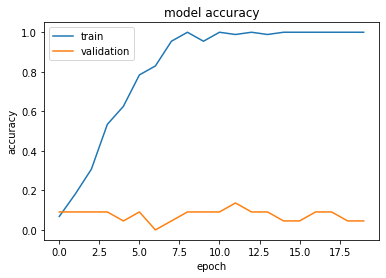

Found 88 validated image filenames belonging to 10 classes.
Found 22 validated image filenames belonging to 10 classes.
Epoch 1/20
3/3 [==============================] - ETA: 0s - loss: 4.5151 - accuracy: 0.0568
Epoch 00001: val_accuracy improved from -inf to 0.18182, saving model to saved_models(20epoch)ITA\model_5.h5
3/3 [==============================] - 3s 869ms/step - loss: 4.5151 - accuracy: 0.0568 - val_loss: 4.0858 - val_accuracy: 0.1818
Epoch 2/20
3/3 [==============================] - ETA: 0s - loss: 2.8789 - accuracy: 0.2614
Epoch 00002: val_accuracy did not improve from 0.18182
3/3 [==============================] - 1s 497ms/step - loss: 2.8789 - accuracy: 0.2614 - val_loss: 3.1392 - val_accuracy: 0.0909
Epoch 3/20
3/3 [==============================] - ETA: 0s - loss: 2.1750 - accuracy: 0.3977
Epoch 00003: val_accuracy did not improve from 0.18182
3/3 [==============================] - 1s 361ms/step - loss: 2.1750 - accuracy: 0.3977 - val_loss: 2.7584 - val_accuracy: 0.090

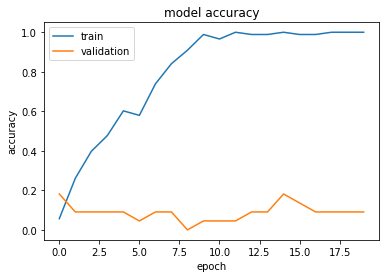

4/4 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9920
Epoch 00016: val_accuracy did not improve from 0.12500
4/4 [==============================] - 3s 747ms/step - loss: 0.0443 - accuracy: 0.9920 - val_loss: 2.3930 - val_accuracy: 0.1250
Epoch 17/20
4/4 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9680
Epoch 00017: val_accuracy improved from 0.12500 to 0.15625, saving model to saved_models(20epoch)ITA\model_1.h5
4/4 [==============================] - 4s 979ms/step - loss: 0.0797 - accuracy: 0.9680 - val_loss: 2.3845 - val_accuracy: 0.1562
Epoch 18/20
4/4 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9840
Epoch 00018: val_accuracy did not improve from 0.15625
4/4 [==============================] - 3s 730ms/step - loss: 0.0595 - accuracy: 0.9840 - val_loss: 2.3865 - val_accuracy: 0.1250
Epoch 19/20
4/4 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 1.0000
Epoch 00019: val_accuracy did n

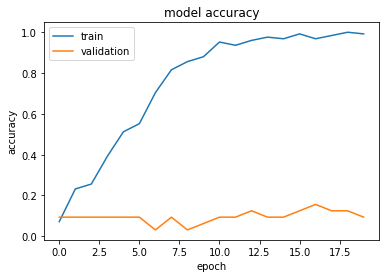

Found 125 validated image filenames belonging to 10 classes.
Found 32 validated image filenames belonging to 10 classes.
Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 5.9944 - accuracy: 0.0960
Epoch 00001: val_accuracy improved from -inf to 0.12500, saving model to saved_models(20epoch)ITA\model_2.h5
4/4 [==============================] - 4s 1s/step - loss: 5.9944 - accuracy: 0.0960 - val_loss: 2.4752 - val_accuracy: 0.1250
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 2.3671 - accuracy: 0.2400
Epoch 00002: val_accuracy did not improve from 0.12500
4/4 [==============================] - 3s 799ms/step - loss: 2.3671 - accuracy: 0.2400 - val_loss: 2.7079 - val_accuracy: 0.1250
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 2.0026 - accuracy: 0.3200
Epoch 00003: val_accuracy did not improve from 0.12500
4/4 [==============================] - 3s 715ms/step - loss: 2.0026 - accuracy: 0.3200 - val_loss: 2.5426 - val_accuracy: 0.0625


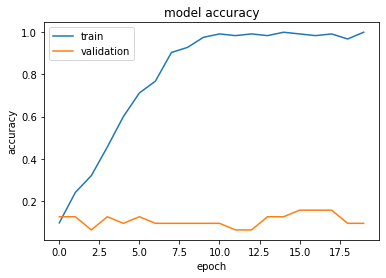

Found 126 validated image filenames belonging to 10 classes.
Found 31 validated image filenames belonging to 10 classes.
Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 5.7993 - accuracy: 0.0556
Epoch 00001: val_accuracy improved from -inf to 0.06452, saving model to saved_models(20epoch)ITA\model_3.h5
4/4 [==============================] - 4s 1s/step - loss: 5.7993 - accuracy: 0.0556 - val_loss: 3.7978 - val_accuracy: 0.0645
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 2.7471 - accuracy: 0.1825
Epoch 00002: val_accuracy did not improve from 0.06452
4/4 [==============================] - 3s 761ms/step - loss: 2.7471 - accuracy: 0.1825 - val_loss: 3.4404 - val_accuracy: 0.0645
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 2.2380 - accuracy: 0.3016
Epoch 00003: val_accuracy did not improve from 0.06452
4/4 [==============================] - 3s 754ms/step - loss: 2.2380 - accuracy: 0.3016 - val_loss: 3.0861 - val_accuracy: 0.0645


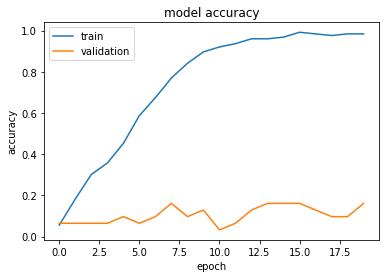

Found 126 validated image filenames belonging to 10 classes.
Found 31 validated image filenames belonging to 10 classes.
Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 6.1790 - accuracy: 0.0794
Epoch 00001: val_accuracy improved from -inf to 0.12903, saving model to saved_models(20epoch)ITA\model_4.h5
4/4 [==============================] - 4s 1s/step - loss: 6.1790 - accuracy: 0.0794 - val_loss: 3.2264 - val_accuracy: 0.1290
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 2.7828 - accuracy: 0.2143
Epoch 00002: val_accuracy did not improve from 0.12903
4/4 [==============================] - 3s 798ms/step - loss: 2.7828 - accuracy: 0.2143 - val_loss: 2.8961 - val_accuracy: 0.0645
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 2.0707 - accuracy: 0.2540
Epoch 00003: val_accuracy did not improve from 0.12903
4/4 [==============================] - 3s 784ms/step - loss: 2.0707 - accuracy: 0.2540 - val_loss: 2.7015 - val_accuracy: 0.0968


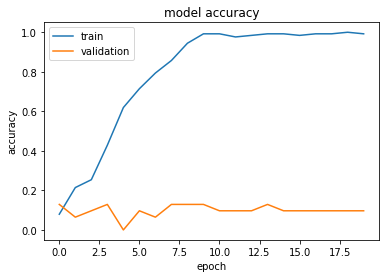

Found 126 validated image filenames belonging to 10 classes.
Found 31 validated image filenames belonging to 10 classes.
Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 6.8968 - accuracy: 0.0397
Epoch 00001: val_accuracy improved from -inf to 0.06452, saving model to saved_models(20epoch)ITA\model_5.h5
4/4 [==============================] - 5s 1s/step - loss: 6.8968 - accuracy: 0.0397 - val_loss: 4.7922 - val_accuracy: 0.0645
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 3.2560 - accuracy: 0.1429
Epoch 00002: val_accuracy improved from 0.06452 to 0.09677, saving model to saved_models(20epoch)ITA\model_5.h5
4/4 [==============================] - 4s 1s/step - loss: 3.2560 - accuracy: 0.1429 - val_loss: 2.6101 - val_accuracy: 0.0968
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 2.1060 - accuracy: 0.2857
Epoch 00003: val_accuracy did not improve from 0.09677
4/4 [==============================] - 4s 856ms/step - loss: 2.1060 - accur

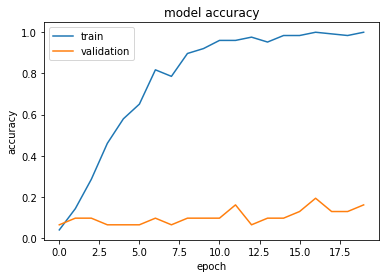

In [25]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(20epoch)ITA/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(110),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../DatasetITA/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../DatasetITA/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=20,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(20epoch)ITA/model_"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 1

In [26]:
VALIDATION_ACCURACY

[0.13636364042758942,
 0.13636364042758942,
 0.13636364042758942,
 0.13636364042758942,
 0.1818181872367859]

[0.15625,
 0.15625,
 0.16129031777381897,
 0.12903225421905518,
 0.19354838132858276]

In [27]:
VALIDATION_LOSS

[6.610217094421387,
 2.4315898418426514,
 2.481576919555664,
 2.4060957431793213,
 4.085761547088623]

[2.3845021724700928,
 2.432870864868164,
 2.3398568630218506,
 3.226438283920288,
 2.393631935119629]